# Lecture 1: Multiplication

In this IPython notebook, we implement the algorithms that we discussed in class for multiplying integers.

## The goal:

Multiply two n-digit integers. 

## The rules: 

We are allowed to use Python's built-in multiplication to do one-digit multiplications (eg, 6 times 7), but not any other multiplication (eg, 66 times 77).  We are allowed to use Python's built-in addition (even of large numbers).

## install



In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\ali\appdata\local\programs\python\python312\lib\site-packages (3.10.0)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pytest

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install ipytest

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# first include a few helper functions that will be useful (like turning integers to digits and back)
from multHelpers import *
# set up matplotlib, for plotting stuff.
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import ipytest
ipytest.autoconfig()

In [ ]:
# These are a few helper functions for the Lecture 1 IPython notebook.

import time
from random import choice

# a few helpful functions
def getDigits(x): # takes an integer x and returns a list of digits, most significant first
    return [ int(a) for a in str(x) ]

def makeInt(digits): # takes a list of digits (as returned by getDigits) and returns the integer they represent
    return sum( [ 10**(len(digits)-i-1)*digits[i] for i in range(len(digits))])


# multABunch: runs a multiplication function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input two n-digit integers
#              (Notice that in python you can pass a function as input!)
#        nVals: list of n values to test at
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def multABunch(myFn, nVals, numTrials=20):
    nValues = []
    tValues = []
    for n in nVals:
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst1 = [ choice(range(10)) for i in range(n) ] # generate a random list of length n
            lst2 = [ choice(range(10)) for i in range(n) ] # generate another random list of length n
            X = makeInt(lst1)
            Y = makeInt(lst2)
            start = time.time()
            myFn( X, Y )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

# next, you can do:
# plt.plot(nValues, tValues)
# or something like that


## Here's our benchmark: grade-school multiplication.

This is probably (equivalent to) the algorithm you learned in grade school.

In [13]:
# look at each pair of digits, and add them up with appropriate shifts.
def gradeSchoolMult( X, Y ): # X and Y are integers
    x = getDigits(X)
    y = getDigits(Y)
    summands = []
    for xDigit in range(len(x)):
        currentXDigit = x[len(x) - xDigit -1]
        z = [0 for i in range(xDigit)] # z is the digits of xDigit times y; start it out with some zeros
        carry = 0
        for yDigit in range(len(y)):
            newProd = getDigits( currentXDigit * y[len(y) - yDigit - 1] + carry )
            z.insert( 0, newProd[-1] ) # put the new digit at the front of our new summand
            if len(newProd) > 1:
                carry = newProd[0]
            else:
                carry = 0
        z.insert(0, carry)
        summands.append(makeInt(z))
    return sum(summands) # finally add them all together # finally add them all together

Now let's see how long this takes!  We'll try it a bunch of times and graph it.  

#### *NOTE*: Don't worry too much (at all) about the plotting code below, you'll never have to generate that for yourself in this course.

#### *NOTE*: This should work fine if you installed Jupyter using anaconda but if you did it in a different way you may need to install matplotlib.

In [31]:
# Generate some evaluation points
nVals = [2**k for k in range(9)] # let's try it at a bunch of powers of 2, we'll see why later...
nVals += [k*10 for k in range(10)]
nVals += [k*50 for k in range(2,11)]# plus some spaced-out points...
nVals.sort() # put them in order

# multABunch (included from multABunch.py) just runs this algorithm a bunch of times.
nValsGS, tValsGS = multABunch(gradeSchoolMult, nVals, numTrials=5)

nice polynomial is 8.723185774624381 + -0.5212845441375903 *x +  0.006402524047152455 x^2


Text(0.5, 1.0, 'Multiplying n-digit integers')

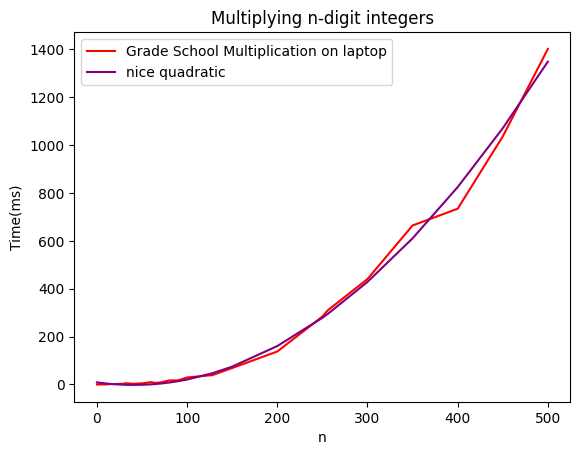

In [32]:
# Now make a pretty picture!  

plt.plot(nValsGS, tValsGS, color="red", label="Grade School Multiplication on laptop")
# after we look at the data, change the False flag to True to fit a quadratic
if True:
    coeffs = np.polyfit( nValsGS, tValsGS, 2 )
    plt.plot(nValsGS, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsGS], color="purple", label="nice quadratic")
    print("nice polynomial is", coeffs[2] ,"+", coeffs[1],"*x + ", coeffs[0] , "x^2")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplying n-digit integers")


Text(0.5, 1.0, 'Multiplying n-digit integers')

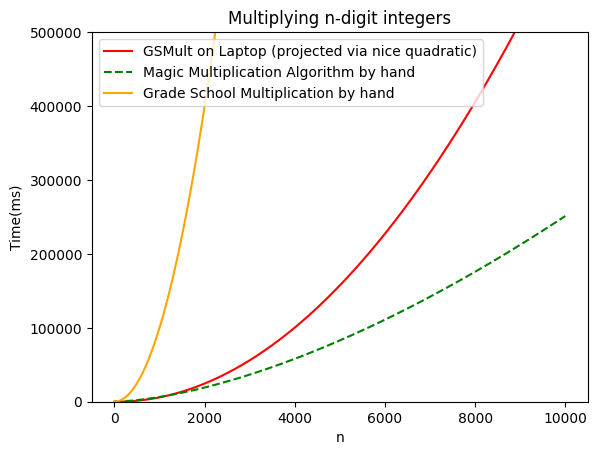

In [33]:
# Let's try interpolating this out a bit (see slides for context)

nValsTmp = range(10000)
plt.plot(nValsTmp, [ coeffs[2] + coeffs[1]*n + coeffs[0]*n**2 for n in nValsTmp], color="red", label="GSMult on Laptop (projected via nice quadratic)")
#plt.plot(nValsGS, tValsGS, color="red", label="Grade School Multiplication on laptop")
plt.plot(nValsTmp, [ n**(1.6)/10 + 100 for n in nValsTmp], "--" , color="green", label="Magic Multiplication Algorithm by hand")
plt.plot(nValsTmp, [ n**(2)/10 + 100 for n in nValsTmp], color="orange", label="Grade School Multiplication by hand")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.ylim(0,500000)
plt.xlim()
plt.legend()
plt.title("Multiplying n-digit integers")

### Now let's try a divide-and-conquer solution!

This algorithm breaks one size-n multiplication into four size n/2 multiplications, and recurses.

In [36]:
def divideAndConquerMult1( X, Y ):
    return divideAndConquerMult1_helper( getDigits(X), getDigits(Y) )

def divideAndConquerMult1_helper( x, y ):
    ##TO-DO
    return result

How fast is this?  Let's try it!

In [47]:
nValsRec, tValsRec = multABunch(divideAndConquerMult1, nVals, numTrials=5)

Text(0.5, 1.0, 'Multiplying n-digit integers')

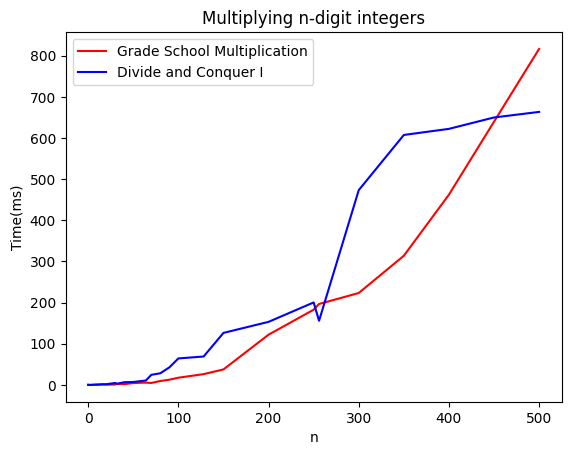

In [15]:
plt.plot(nValsGS, tValsGS, color="red", label="Grade School Multiplication")
plt.plot(nValsRec, tValsRec, color="blue", label="Divide and Conquer I")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplying n-digit integers")

Hmm...pretty hard to tell from this plot which one is asymptotically better.  (And there's definitely something weird going on at powers of two in the divide-and-conquer implementation above).  We'll need to turn to some mathematical analysis to understand how this algorithm behaves as n gets large.

## Karatsuba multiplication

The previous algorithms ended up both using about n^2 operations.  Karatsuba multiplication will do better!  It is also a divide-and-conquer approach, but turns one multiplication of size n into three multiplications of size n/2.

In [48]:
def karatsuba( X, Y ):
    return karatsuba_helper( getDigits(X), getDigits(Y))

def karatsuba_helper( x, y ):  
    ##TO-DO
    return result

In [18]:
nValsKarat, tValsKarat = multABunch(karatsuba, nVals, numTrials=5)

Text(0.5, 1.0, 'Multiplying n-digit integers')

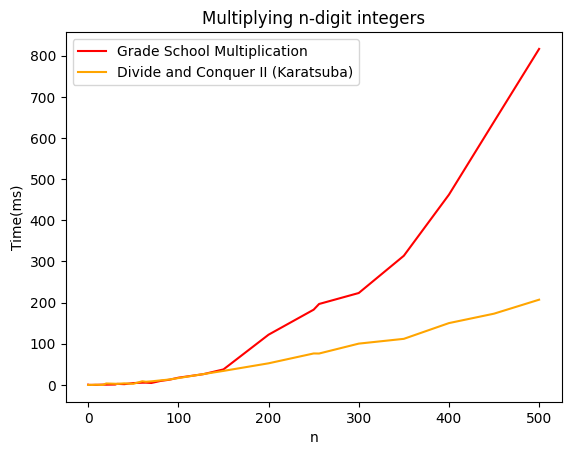

In [19]:
plt.plot(nValsGS, tValsGS, color="red", label="Grade School Multiplication")
#plt.plot(nValsRec, tValsRec, color="grey", label="Divide and Conquer I")
plt.plot(nValsKarat, tValsKarat, color="orange", label="Divide and Conquer II (Karatsuba)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Multiplying n-digit integers")

Cool, it does seem to work better than grade-school multiplication!